# Prediction

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'Heart_disease.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb']


# Import Dataset
(https://www.kaggle.com/ronitf/heart-disease-uci)

In [3]:
dataset = pd.read_csv("values.csv")

# Data Analysation

Peek through Dataset

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Describe Dataset Deriving Descriptive statistics

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Target Variable Analysation

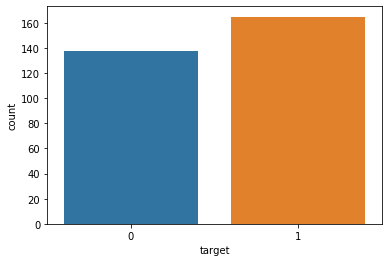

In [6]:
sns.countplot(dataset["target"])

# Train and Test split data

Give total of 80% to train and 20% to test

In [7]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [8]:
X_train.shape


(242, 13)

# Model Using Random Forest Learning Algorithm

In [9]:
rnd_clf = RandomForestClassifier(n_estimators=1000)
rnd_clf.fit(X_train, Y_train)
Y_pred = rnd_clf.predict(X_test)

accuracy_score=sm.accuracy_score(Y_test, Y_pred)
print('Accuracy score given for test data:',str(accuracy_score))

Accuracy score given for test data: 0.8688524590163934


# Generata Classification Report

In [10]:
from sklearn import metrics
print("Classification Report : \n\n", metrics.classification_report(Y_pred, Y_test, target_names = ["Heart Disease","No Heart Disease"]))

Classification Report : 

                   precision    recall  f1-score   support

   Heart Disease       0.85      0.85      0.85        27
No Heart Disease       0.88      0.88      0.88        34

        accuracy                           0.87        61
       macro avg       0.87      0.87      0.87        61
    weighted avg       0.87      0.87      0.87        61



# Generate featuer importances

In [11]:
sns.set() 
get_ipython().run_line_magic('matplotlib', 'inline') 
importances = list(rnd_clf.feature_importances_)
data_feature_list = list(predictors.columns)

feature_importances = [(feature, round(importance, 2)) for feature, 
                       importance in zip(data_feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
get_ipython().run_line_magic('matplotlib', 'inline')

Variable: ca                   Importance: 0.14
Variable: cp                   Importance: 0.13
Variable: thalach              Importance: 0.12
Variable: oldpeak              Importance: 0.11
Variable: thal                 Importance: 0.1
Variable: age                  Importance: 0.09
Variable: chol                 Importance: 0.08
Variable: trestbps             Importance: 0.07
Variable: exang                Importance: 0.06
Variable: sex                  Importance: 0.05
Variable: slope                Importance: 0.04
Variable: restecg              Importance: 0.02
Variable: fbs                  Importance: 0.01


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
graph.write_png("iris.png")

InvocationException: GraphViz's executables not found